In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/Student_Performance.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


In [ ]:
numerical_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
                      'Sample Question Papers Practiced']
target = 'Performance Index'


X = df[numerical_features]
y = df[target]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model_linear = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)


model_linear.fit(x_train, y_train)
model_rf.fit(x_train, y_train)
model_gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred_linear = model_linear.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_gb = model_gb.predict(x_test)

In [ ]:
models = {
    'Linear Regression': y_pred_linear,
    'Random Forest Regressor': y_pred_rf,
    'Gradient Boosting Regressor': y_pred_gb
}
results = {}
for name, preds in models.items():
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results[name] = {'R-squared': r2, 'RMSE': rmse}
for name, metrics in results.items():
    print(f"{name}: R² = {metrics['R-squared']:.4f}, RMSE = {metrics['RMSE']:.4f}")

Linear Regression: R² = 0.9880, RMSE = 2.0321
Random Forest Regressor: R² = 0.9835, RMSE = 2.3827
Gradient Boosting Regressor: R² = 0.9869, RMSE = 2.1263


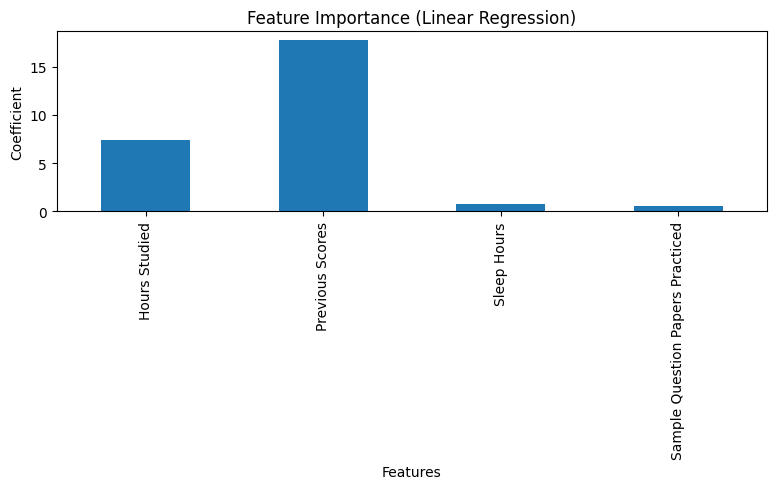

In [ ]:
plt.figure(figsize=(8, 5))
coefficients = pd.Series(model_linear.coef_, index=numerical_features)
coefficients.plot(kind='bar')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

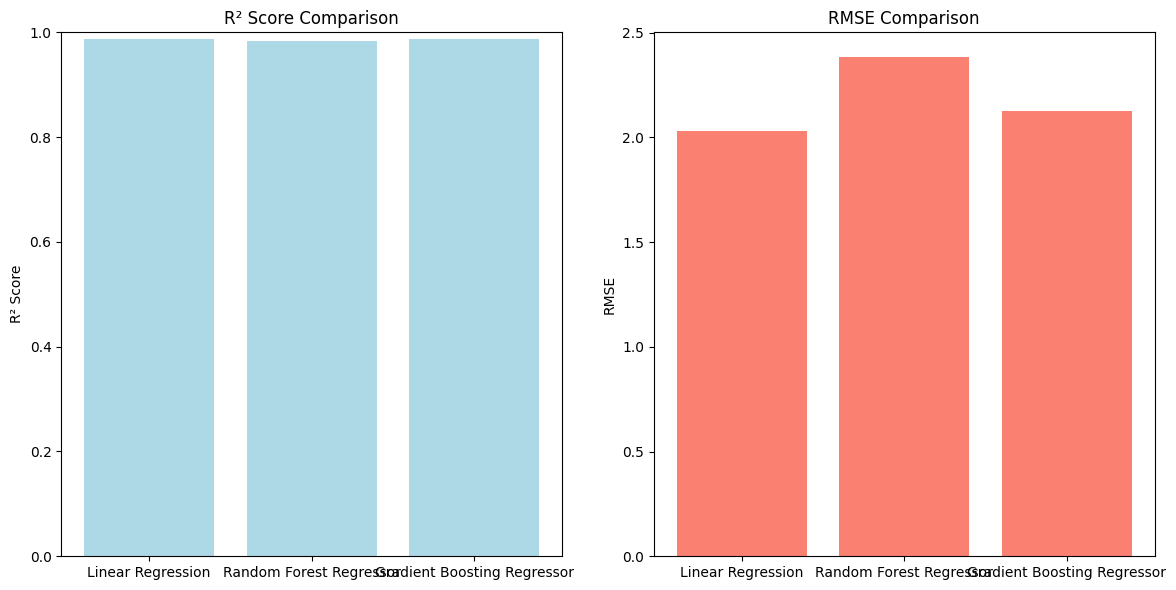

In [ ]:
model_names = list(results.keys())
r2_scores = [results[m]['R-squared'] for m in model_names]
rmse_scores = [results[m]['RMSE'] for m in model_names]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='lightblue')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)


plt.subplot(1, 2, 2)
plt.bar(model_names, rmse_scores, color='salmon')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()